In [4]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

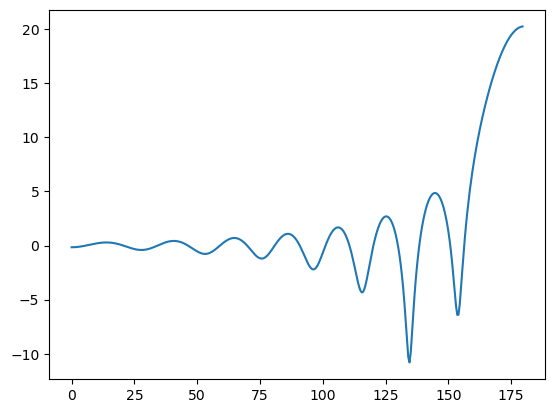

In [7]:
data = np.loadtxt("./logs/sigma.txt")
x = data[0]
y = data[1]
sigma = 10 * np.log10(y / np.pi)
plt.plot(x, sigma)

In [5]:
d_3k = 0.24271
d_6k = 0.221561
d_1k = 0.479871

In [7]:
import pandas as pd
df = pd.read_csv("./data/series.csv", header=None, delimiter='\t', decimal = ',')
df
x_series = df[0]
y_series = df[1]

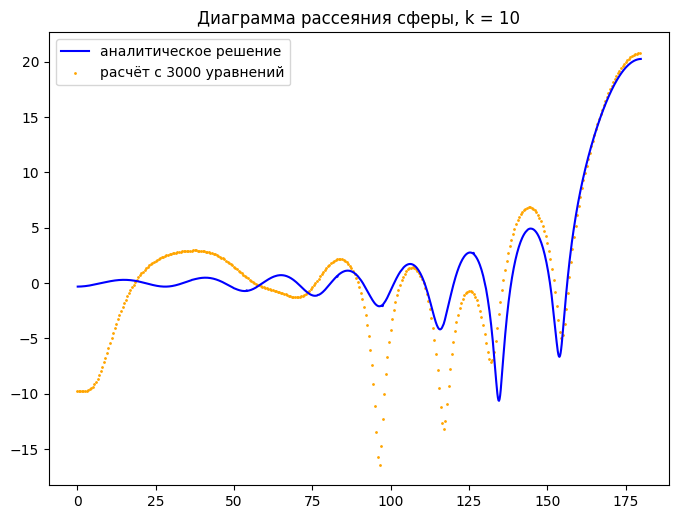

In [8]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Диаграмма рассеяния сферы, k = 10")
plt.scatter(x, sigma, s = 1,color='orange', label="расчёт с 3000 уравнений")
plt.plot(x_series, y_series, color='blue', label='аналитическое решение')
plt.legend()
plt.savefig("final results.png")

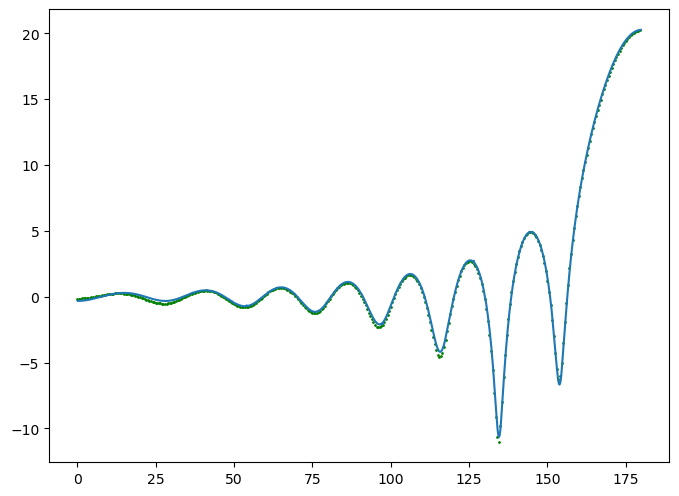

In [109]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x_series, y_series)
plt.scatter(x, sigma_3k, color = 'g', s = 1, label="расчёт с 3000 уравнений")

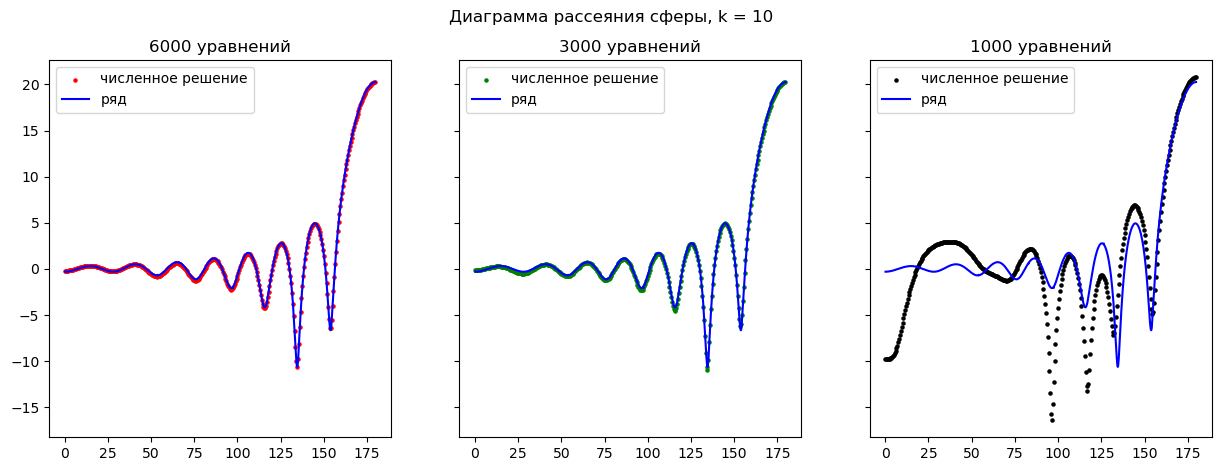

In [146]:
fig, axs = plt.subplots(1,3,sharey=True, figsize=(15, 5), dpi=100)
fig.suptitle("Диаграмма рассеяния сферы, k = 10")

axs[0].scatter(x, sigma_6k, s=5, color='r', label = "численное решение")
axs[0].plot(x_series, y_series, color='b', label = "ряд")
axs[0].set_title("6000 уравнений")
axs[0].legend()

axs[1].scatter(x, sigma_3k, s=5, color='g', label = "численное решение")
axs[1].plot(x_series, y_series, color='b', label = "ряд")
axs[1].set_title("3000 уравнений")
axs[1].legend()


axs[2].scatter(x, sigma_k, s=5, color='black', label = "численное решение")
axs[2].plot(x_series, y_series, color='b', label = "ряд")
axs[2].set_title("1000 уравнений")
axs[2].legend()

plt.savefig("../CLionProjects/Sirius/results/series_plots.png")

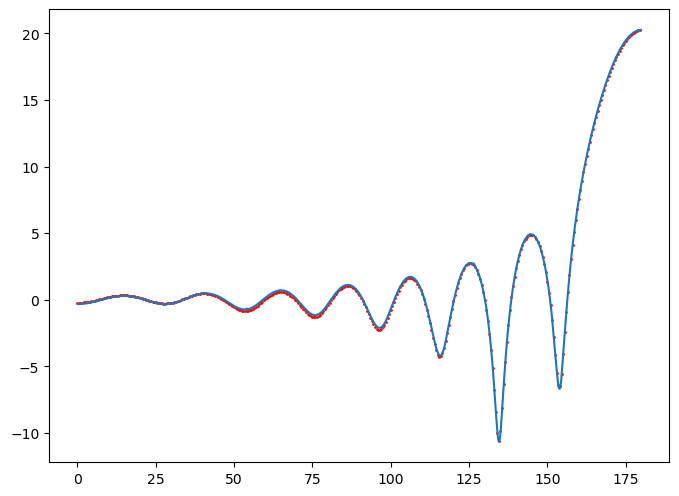

In [110]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x_series, y_series)
plt.scatter(x, sigma_6k, color = 'r', s = 1, label="расчёт с 6000 уравнений")